## **Librerías**


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Librerías de clasificación
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Librerias para SVM
from sklearn import svm

# Librerías para Multi-Class
from sklearn.svm import SVC

# Librerías Arboles de Decisión
from sklearn.tree import DecisionTreeClassifier

# Librerúas Sub-Muestreo
from imblearn.under_sampling import RandomUnderSampler

# Overfitting & Underfitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

# Genera datos de ejemplo Regresión logística y Correlación
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], size=100, p=[0.8, 0.2])

X_fitt = np.sort(5 * np.random.rand(80, 1), axis=0)
y_fitt = np.sin(X_fitt).ravel() + np.random.normal(0, 0.1, X_fitt.shape[0])

# Genera datos de ejemplo para Selección de Características (100 muestras y 10 características)
X_feat, y_feat = make_classification(n_samples=100, n_features=10, random_state=42, flip_y=False)
X_feat = np.abs(X_feat) # Fuerza que no existan carácterísticas negativas

## **Clasificación Simple**

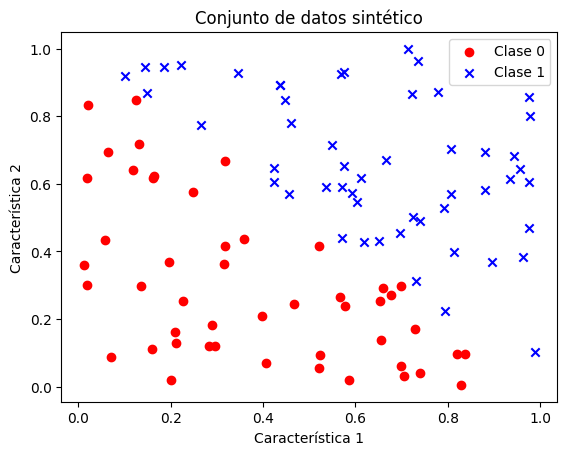

In [ ]:
# Clasificación simple
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Visualiza los datos
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Conjunto de datos sintético')
plt.show()

## **Regresión Logística**

In [ ]:
# Implementa la regresión logística
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

# Añade una columna de unos a X para el término de sesgo
X = np.hstack((np.ones((X.shape[0], 1)), X))
# print(X)

# Divide los datos en entrenamiento y prueba
X_train, X_test = X[:80], X[80:]
# print(X_train)
# print(X_test)
y_train, y_test = y[:80], y[80:]
# print(y_train)
# print(y_test)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión del modelo
accuracy = np.mean(y_pred == y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 95.00%


## **Correlación**
### Correlación de Pearson:
* También conocida como "correlación lineal" o "coeficiente de correlación de Pearson".
* Mide la relación lineal entre dos variables continuas.
* Supone que las variables siguen una [distribución normal](https://www.matematicasonline.es/BachilleratoCCSS/segundo/archivos/distribucion_normal/DISTRIBUCION%20NORMAL.htm) y que la relación entre ellas es lineal.
* Se utiliza comúnmente para medir la relación entre dos variables cuantitativas, como edad y ingresos.
* Los valores van de -1 a 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica ausencia de correlación.

###Correlación de Spearman:

* También conocida como "correlación de rango de Spearman".
* Mide la relación monótona entre dos variables, es decir, si el aumento en una variable se asocia con el aumento o disminución en la otra.
* No requiere que las variables sigan una distribución normal ni que la relación sea lineal.
* Se utiliza cuando las variables son ordinales o no siguen una distribución normal.
* Se calcula mediante la clasificación de los valores de las variables y la comparación de los rangos de los valores.

###Correlación de Kendall:

* También conocida como "tau de Kendall".
* Mide la relación de concordancia o discordancia entre dos variables, es decir, si los pares de observaciones mantienen el mismo orden o no.
* No asume una distribución normal ni una relación lineal y es robusta frente a valores atípicos.
* A menudo se utiliza cuando se tienen datos ordinales o cuando la relación no es necesariamente lineal.
* Se calcula contando los pares de datos que son concordantes y discordantes.

Calcularemos la **Correlación de Pearson** entre dos características presentes en la matriz **X. X[:, 0]** que representa la primera característica, y **X[:, 1]** que representa la segunda característica. Usaremos la función [np.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) que calcula la matriz de correlación entre estas dos características. Se utiliza comúnmente cuando se asume una relación lineal, como en el análisis de regresión, para evaluar la relación entre dos variables cuantitativas.

Correlación de Pearson entre X[:, 0] y X[:, 1]: -0.06834832770642568


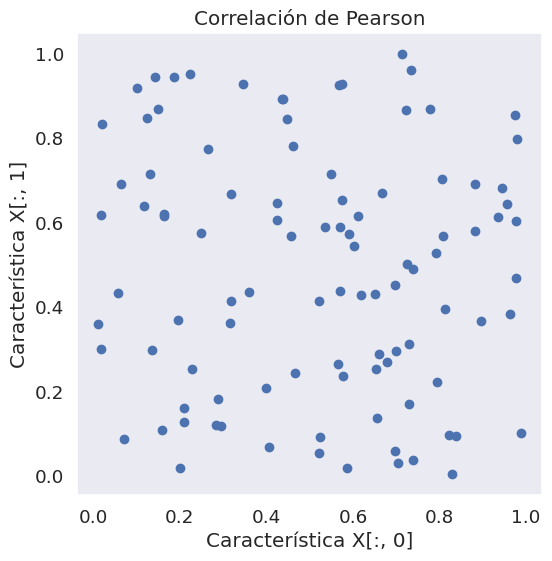

In [ ]:
# Calcula la correlación de Pearson entre las dos características
correlation = np.corrcoef(X[:, 0], X[:, 1])[0, 1]

print("Correlación de Pearson entre X[:, 0] y X[:, 1]:", correlation)
# Anota el valor de correlación y el valor p en el gráfico
# plt.annotate(f'Correlación_X = {correlation:.2f}', xy=(0.5, 0.9))

# Grafica un scatter plot de las dos características
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label=f'Correlación = {correlation:.2f}')
plt.xlabel('Característica X[:, 0]')
plt.ylabel('Característica X[:, 1]')
plt.title('Correlación de Pearson')

# Anota el valor de correlación y el valor p en el gráfico
# plt.annotate(f'Correlación = {correlation:.2f}', xy=(0.5, 0.9))

plt.grid()
plt.show()

Calcularemos la **Correlación de Spearman** entre dos características presentes en la matriz **X. X[:, 0]** que representa la primera característica, y **X[:, 1]** que representa la segunda característica. La función spearmanr devolverá dos valores: correlation_spearmanr, que es la correlación de Spearman, y p_value, que es el valor p asociado a la prueba de correlación de Spearman. Se utiliza cuando no se asume una relación lineal, como en la comparación de calificaciones de dos pruebas, para evaluar la relación entre variables ordinales o cuando se desea ser menos sensible a valores atípicos.

Correlación de Searmanr entre X[:, 0] y X[:, 1]: -0.08118811881188119


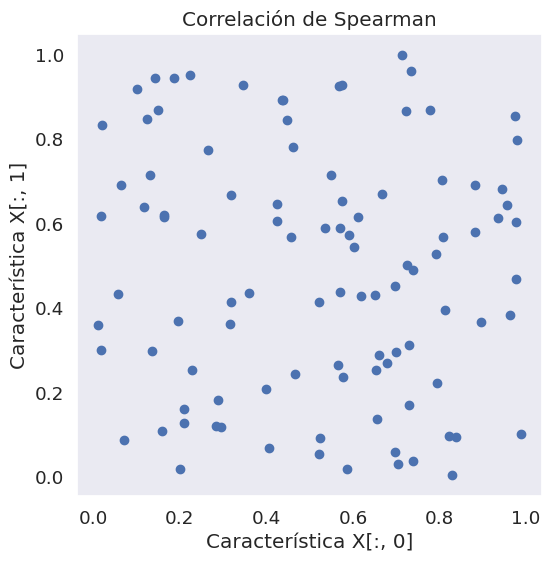

In [ ]:
correlation_spearmanr, p_value = spearmanr(X[:, 0], X[:, 1])

print("Correlación de Searmanr entre X[:, 0] y X[:, 1]:", correlation_spearmanr)

# Grafica un scatter plot de las dos características
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Característica X[:, 0]')
plt.ylabel('Característica X[:, 1]')
plt.title('Correlación de Spearman')

# Anota el valor de correlación y el valor p en el gráfico
# plt.annotate(f'Correlación = {correlation_spearmanr:.2f}', xy=(0.5, 0.9))
# plt.annotate(f'Valor p = {p_value:.4f}', xy=(0.5, 0.85))

plt.grid()
plt.show()


Calcularemos la **Correlación de Kendalltau** entre dos características presentes en la matriz **X. X[:, 0]** que representa la primera característica, y **X[:, 1]** que representa la segunda característica. La función kendalltau devuelve dos valores: correlation_kendalltau, que es la correlación de Kendall Tau, y p_value, que es el valor p asociado a la prueba de correlación de Kendall. Se utiliza en situaciones similares a la de Spearman, pero es especialmente útil cuando se trabaja con datos ordinales o categóricos y cuando se desea una medida robusta ante valores atípicos.

Correlación Tau de Kendall = -0.05
Valor p = 0.4602


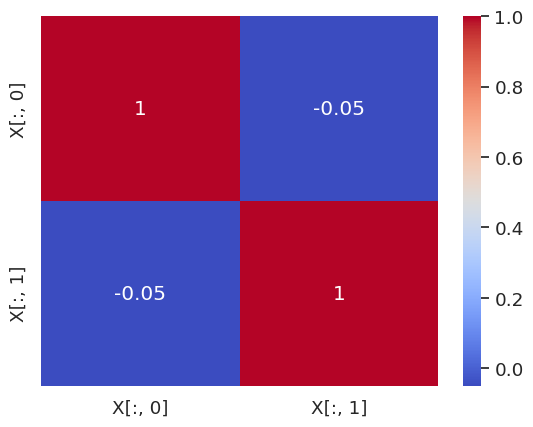

In [ ]:
correlation_kendalltau, p_value = kendalltau(X[:, 0], X[:, 1])
# print("Correlación de Kendalltau entre X[:, 0] y X[:, 1]:", correlation_kendalltau)

# Grafica un scatter plot de las dos características
# plt.figure(figsize=(6, 6))
# plt.scatter(X[:, 0], X[:, 1])
# plt.xlabel('Característica X[:, 0]')
# plt.ylabel('Característica X[:, 1]')
# plt.title('Correlación de Kendall Tau')

# Crea un mapa de calor
labels = ['X[:, 0]', 'X[:, 1]']
correlation_matrix = np.array([[1, correlation_kendalltau],[correlation_kendalltau, 1]])

# Configura el mapa de calor usando seaborn
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)

# Mostrar el valor de correlación y el valor p
print(f'Correlación Tau de Kendall = {correlation_kendalltau:.2f}')
print(f'Valor p = {p_value:.4f}')

plt.grid()
plt.show()

Aplicación de carácterísticas, mediante **SelectKBest** que se utiliza para seleccionar las mejores características de acuerdo con una métrica específica. En este caso, se está utilizando la métrica [chi-cuadrado](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html). **Chi-cuadrado** se utiliza para determinar si existe una relación estadística entre dos variables categóricas en un conjunto de datos. Esta métrica es útil para medir la dependencia entre dos variables y se utiliza comúnmente en el análisis de tablas de contingencia


In [ ]:
# Aplica SelectKBest con la métrica chi-cuadrado para seleccionar las mejores 5 características
k_best = SelectKBest(score_func=chi2, k=5)
X_new = k_best.fit_transform(X_feat, y_feat)
# print(X_new)

# Obtén las características seleccionadas
selected_features = np.where(k_best.get_support())[0]
# print(selected_features)

print("Características originales:", list(range(X_feat.shape[1])))
print("Características seleccionadas:", selected_features)

[[4.76898369e-01 5.21303748e-01 1.25198379e-01 1.48449581e-01
  6.11927193e-01]
 [4.51303037e-01 7.07505698e-01 7.31712082e-02 2.65687975e-01
  3.97667346e-02]
 [5.21064876e-01 1.07961859e+00 1.16940705e+00 5.75787970e-01
  8.13364259e-01]
 [1.51999486e+00 6.84501107e-01 5.54893707e-02 1.71958931e+00
  3.70825001e-01]
 [9.44446256e-01 3.17218215e-01 8.49123046e-01 4.10049693e-01
  7.86327962e-01]
 [6.58552967e-01 1.29802197e+00 3.01549448e-02 5.14233966e-01
  2.69622405e+00]
 [3.09114445e-01 8.07648488e-01 5.77822712e-01 2.33466662e-01
  1.44653470e+00]
 [5.64008535e-01 1.05188010e+00 3.21693913e-01 1.28455230e+00
  2.49720039e+00]
 [1.74235620e+00 1.66069981e+00 4.69537098e-01 1.30324275e+00
  1.15147873e-01]
 [4.26258731e-01 7.81198102e-01 1.94473774e+00 6.76908035e-01
  1.49448454e+00]
 [1.33701560e-01 1.34671751e+00 1.43043530e-01 1.07774381e+00
  6.93773153e-01]
 [2.22605681e-01 1.04797216e+00 1.09140294e-01 9.13079218e-01
  2.84279671e-01]
 [2.65917224e+00 1.18894496e+00 7.659970

Puntuaciones de características:
Característica 1: 0.59
Característica 2: 0.00
Característica 3: 0.68
Característica 4: 0.74
Característica 5: 1.14
Característica 6: 0.85
Característica 7: 0.00
Característica 8: 0.09
Característica 9: 0.02
Característica 10: 0.09

Características seleccionadas (índices): [0 2 3 4 5]


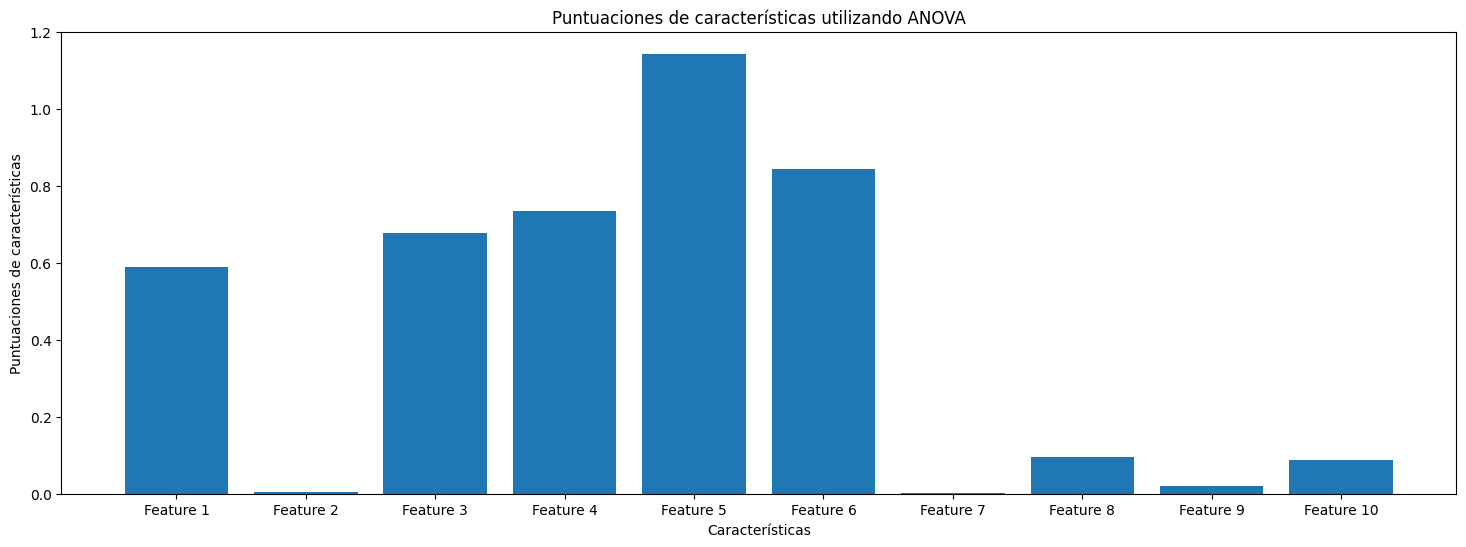

In [ ]:
# Aplica el método de filtro utilizando ANOVA Ref: https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476
num_features_to_select = 5
feature_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_filter = feature_selector.fit_transform(X_feat, y_feat)

# Obtener las puntuaciones de características
feature_scores = feature_selector.scores_

# Obtener las características seleccionadas
selected_feature_indices = feature_selector.get_support(True)

print("Puntuaciones de características:")
for feature, score in enumerate(feature_scores):
    print(f"Característica {feature + 1}: {score:.2f}")

print("\nCaracterísticas seleccionadas (índices):", selected_feature_indices)

# Graficar las puntuaciones de características
plt.figure(figsize=(18, 6))
plt.bar(range(len(feature_scores)), feature_scores, tick_label=[f'Feature {i+1}' for i in range(len(feature_scores))])
plt.xlabel('Características')
plt.ylabel('Puntuaciones de características')
plt.title('Puntuaciones de características utilizando ANOVA')
plt.show()

In [ ]:
# Inicializa el clasificador (puedes usar otros clasificadores según tus necesidades)
classifier = LogisticRegression(solver='liblinear')

# Inicializa RFE para seleccionar 5 características
num_features_to_select = 5
rfe = RFE(estimator=classifier, n_features_to_select=num_features_to_select)

# Ajusta RFE al conjunto de datos
rfe.fit(X_feat, y_feat)

# Obtén las características seleccionadas
selected_feature_indices = rfe.support_
selected_features = [f'Feature {i + 1}' for i, selected in enumerate(selected_feature_indices) if selected]

print("Características seleccionadas:")
for feature in selected_features:
    print(feature)

Características seleccionadas:
Feature 1
Feature 3
Feature 4
Feature 5
Feature 6


In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42)

# Inicializa un clasificador (puedes usar otros clasificadores según tus necesidades)
classifier = LogisticRegression(solver='liblinear')

# Inicializa una lista para almacenar características seleccionadas
selected_features_forward = []
selected_features_backward = list(range(X_train.shape[1]))  # Comenzar con todas las características
selected_features_rfe = None

# Realiza la selección de características con Forward Selection
while len(selected_features_forward) < X_train.shape[1]:
    best_feature = None
    best_accuracy = 0
    for feature in range(X_train.shape[1]):
        if feature in selected_features_forward:
            continue
        features_to_use = selected_features_forward + [feature]
        X_train_subset = X_train[:, features_to_use]
        X_test_subset = X_test[:, features_to_use]
        classifier.fit(X_train_subset, y_train)
        y_pred = classifier.predict(X_test_subset)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature
    if best_feature is not None:
        selected_features_forward.append(best_feature)
    else:
        break

# Realiza la selección de características con Backward Selection
while len(selected_features_backward) > 0:
    worst_feature = None
    worst_accuracy = best_accuracy
    for feature in selected_features_backward:
        features_to_use = selected_features_backward.copy()
        features_to_use.remove(feature)
        X_train_subset = X_train[:, features_to_use]
        X_test_subset = X_test[:, features_to_use]
        classifier.fit(X_train_subset, y_train)
        y_pred = classifier.predict(X_test_subset)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > worst_accuracy:
            worst_accuracy = accuracy
            worst_feature = feature
    if worst_feature is not None:
        selected_features_backward.remove(worst_feature)
    else:
        break

# Realiza la selección de características con Recursive Feature Elimination (RFE)
num_features_to_select = 5
rfe = RFE(estimator=classifier, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)
selected_features_rfe = rfe.support_

# Obtén las características seleccionadas
selected_feature_names_forward = [f'Feature {i + 1}' for i in selected_features_forward]
selected_feature_names_backward = [f'Feature {i + 1}' for i in selected_features_backward]
selected_feature_names_rfe = [f'Feature {i + 1}' for i, selected in enumerate(selected_features_rfe) if selected]

print("Características seleccionadas con Forward Selection:")
for feature in selected_feature_names_forward:
    print(feature)

print("\nCaracterísticas seleccionadas con Backward Selection:")
for feature in selected_feature_names_backward:
    print(feature)

print("\nCaracterísticas seleccionadas con Recursive Feature Elimination (RFE):")
for feature in selected_feature_names_rfe:
    print(feature)

Características seleccionadas con Forward Selection:
Feature 3
Feature 9
Feature 5
Feature 8
Feature 7
Feature 2
Feature 1
Feature 4
Feature 10
Feature 6

Características seleccionadas con Backward Selection:
Feature 4
Feature 6
Feature 8
Feature 10

Características seleccionadas con Recursive Feature Elimination (RFE):
Feature 1
Feature 4
Feature 5
Feature 6
Feature 10


## **Codigo de KNN con Rechazo**

In [ ]:
# Inicializa el clasificador KNN con un valor de k
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Ajusta el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcula la precisión del modelo sin rechazo
accuracy = accuracy_score(y_test, y_pred)

# Umbral para el rechazo
umbral_rechazo = 0.5

# Realiza predicciones en el conjunto de prueba con rechazo
y_pred_with_rechazo = []
for i in range(len(X_test)):
    distancias, indices = knn_classifier.kneighbors([X_test[i]], n_neighbors=k)
    promedio_distancias = np.mean(distancias)
    if promedio_distancias <= umbral_rechazo:
        y_pred_with_rechazo.append(y_pred[i])
        y_pred_with_rechazo.append(-1)
    else:
        y_pred_with_rechazo.append(knn_classifier.predict([X_test[i]]))

# Calcula la precisión del modelo con rechazo
y_pred_with_rechazo = np.array(y_pred_with_rechazo)
y_pred_with_rechazo = y_pred_with_rechazo[y_pred_with_rechazo != -1]
accuracy_with_rechazo = accuracy_score(y_test, y_pred_with_rechazo)

print(f"Precisión del modelo KNN sin rechazo: {accuracy:.2f}")
print(f"Precisión del modelo KNN con rechazo (umbral {umbral_rechazo}): {accuracy_with_rechazo:.2f}")

Precisión del modelo KNN sin rechazo: 0.35
Precisión del modelo KNN con rechazo (umbral 0.5): 0.35


## **Codigo de KNN con Distancia**

In [ ]:
# Inicializa el clasificador KNN con un valor de k
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Ajusta el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcula la precisión del modelo sin distancia media
accuracy = accuracy_score(y_test, y_pred)

# Umbral para la distancia media
umbral_distancia_media = 0.5

# Realiza predicciones en el conjunto de prueba con distancia media
y_pred_con_distancia_media = []
for i in range(len(X_test)):
    distancias, indices = knn_classifier.kneighbors([X_test[i]], n_neighbors=k)
    promedio_distancias = np.mean(distancias)
    if promedio_distancias <= umbral_distancia_media:
        y_pred_con_distancia_media.append(y_pred[i])
    else:
        y_pred_con_distancia_media.append(1 - y_pred[i])  # Invierte la etiqueta original

# Calcula la precisión del modelo con distancia media
accuracy_con_distancia_media = accuracy_score(y_test, y_pred_con_distancia_media)

print(f"Precisión del modelo KNN sin distancia media: {accuracy:.2f}")
print(f"Precisión del modelo KNN con distancia media (umbral {umbral_distancia_media}): {accuracy_con_distancia_media:.2f}")

Precisión del modelo KNN sin distancia media: 0.35
Precisión del modelo KNN con distancia media (umbral 0.5): 0.65


## **Codigo de KNN con onderación en ejemplos y características**

In [ ]:
# Inicializa el clasificador KNN con un valor de k y peso uniforme
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='uniform')

# Ajusta el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcula la precisión del modelo con peso uniforme
accuracy_uniform = accuracy_score(y_test, y_pred)

# Cambia el peso a distancia inversa (mayor peso a ejemplos cercanos)
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')

# Ajusta el modelo a los datos de entrenamiento con peso de distancia inversa
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba con peso de distancia inversa
y_pred_distance_weighted = knn_classifier.predict(X_test)

# Calcula la precisión del modelo con peso de distancia inversa
accuracy_distance_weighted = accuracy_score(y_test, y_pred_distance_weighted)

print(f"Precisión del modelo KNN con peso uniforme: {accuracy_uniform:.2f}")
print(f"Precisión del modelo KNN con peso de distancia inversa: {accuracy_distance_weighted:.2f}")

Precisión del modelo KNN con peso uniforme: 0.35
Precisión del modelo KNN con peso de distancia inversa: 0.45


## **Support Vector Machine: Linealmente separables**


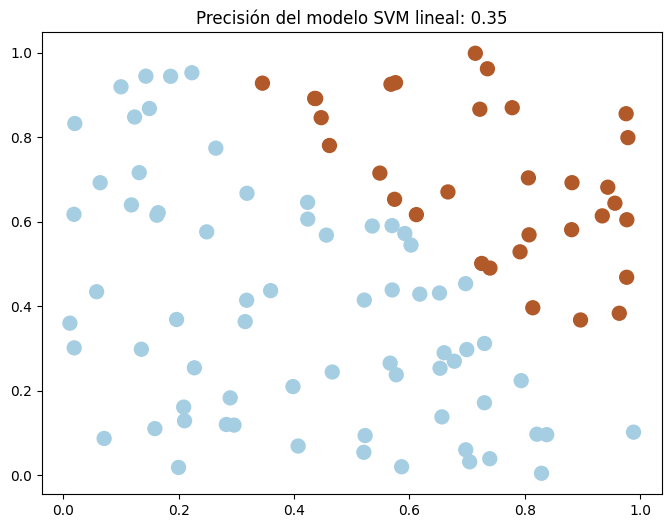

In [ ]:
# Inicializa el clasificador SVM lineal
clf = svm.SVC(kernel='linear')

# Ajusta el modelo a los datos de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = np.mean(y_pred == y_test)

# Visualiza los datos y la superficie de decisión
plt.figure(figsize=(8, 6))

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Dibuja la superficie de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.title(f"Precisión del modelo SVM lineal: {accuracy:.2f}")
plt.show()

## **Support Vector Machine: Regularizacion**

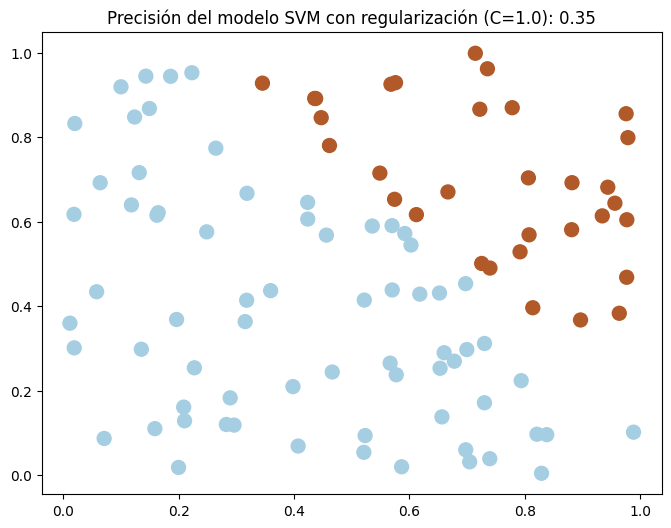

In [ ]:
# Inicializa el clasificador SVM con regularización (parámetro C)
C = 1.0  # Valor de ajuste
clf = svm.SVC(C=C, kernel='linear')

# Ajusta el modelo a los datos de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = np.mean(y_pred == y_test)

# Visualiza los datos y la superficie de decisión
plt.figure(figsize=(8, 6))

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Dibuja la superficie de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.title(f"Precisión del modelo SVM con regularización (C={C}): {accuracy:.2f}")
plt.show()

# Modelos de Clasificación Multi-Clase

Un clasificador OvO (One-Versus-One), también conocido como "uno contra uno", es una técnica de clasificación utilizada en problemas de clasificación multiclase. En lugar de tratar de clasificar directamente múltiples clases, la técnica OvO descompone el problema en múltiples clasificadores binarios. Básicamente, se crea un clasificador binario para cada posible par de clases. Esto significa que si tienes N clases, se generarán N(N-1)/2 clasificadores binarios.

In [ ]:
# Crear un clasificador SVM OvO.
# Se creará un clasificador binario para cada par de clases posibles y se realizará una votación para tomar la decisión final.
# Esta es una estrategia común para abordar problemas de clasificación multiclase.
svm_classifier_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)

# Entrenar el clasificador
svm_classifier_ovo.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier_ovo.predict(X_feat)
# print(X_feat)
print(y_pred)

# Calcular la precisión
accuracy_ovo = accuracy_score(y_feat, y_pred)
print(f'Precisión: {accuracy_ovo}')

[1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0]
Precisión: 0.64


Un clasificador OvR (One-Versus-Rest), también conocido como "uno contra el resto" o "uno contra todos", es una técnica de clasificación utilizada en problemas de clasificación multiclase. En lugar de tratar de clasificar directamente múltiples clases, la técnica OvR descompone el problema en múltiples clasificadores binarios. Básicamente, se crea un clasificador binario para cada clase, y cada uno de ellos se entrena para distinguir entre una clase específica y el "resto" de las clases.

In [ ]:
# Crear un clasificador SVM OvR
# Se creará un clasificador binario para cada par de clases posibles y se realizará una votación para tomar la decisión final.
# Esta es una estrategia común para abordar problemas de clasificación multiclase.
svm_classifier_ovr = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Entrenar el clasificador
svm_classifier_ovr.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier_ovr.predict(X_feat)
print(y_pred)

# Calcular la precisión
accuracy_ovr = accuracy_score(y_feat, y_pred)
print(f'Precisión: {accuracy_ovr}')

[1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0]
Precisión: 0.64


La puntuación F1 en el contexto de machine learning es una métrica de evaluación de clasificación que combina la precisión (precision) y el recall (sensibilidad) en un solo valor. Se utiliza para evaluar el rendimiento de un modelo de clasificación, especialmente en problemas donde el equilibrio entre la precisión y el recall es importante.

In [ ]:
# Crear un clasificador de regresión logística para calcular Puntuación F1
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el clasificador
logreg_classifier.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg_classifier.predict(X_feat)

# Calcular el puntaje F1
f1 = f1_score(y_feat, y_pred)
print(f'Puntaje F1: {f1}')

Puntaje F1: 0.5858585858585857


La matriz de confusión es una herramienta esencial en el campo de la evaluación de modelos de clasificación en machine learning. Se utiliza para visualizar el rendimiento de un modelo de clasificación al comparar las predicciones del modelo con los valores reales del conjunto de datos. La matriz de confusión es especialmente útil cuando se trata de problemas de clasificación binaria o multiclase.

La matriz de confusión es una tabla que organiza las predicciones del modelo en cuatro categorías:

1.   **Verdaderos positivos (True Positives, TP)**: Estos son los casos en los que el modelo predice correctamente una instancia como positiva cuando realmente es positiva.
2.   **Falsos positivos (False Positives, FP)**: Estos son los casos en los que el modelo predice incorrectamente una instancia como positiva cuando en realidad es negativa (un error de tipo I).
3.   **Verdaderos negativos (True Negatives, TN)**: Estos son los casos en los que el modelo predice correctamente una instancia como negativa cuando realmente es negativa.
4.  **Falsos negativos (False Negatives, FN)**: Estos son los casos en los que el modelo predice incorrectamente una instancia como negativa cuando en realidad es positiva (un error de tipo II).


|       Clase real      |     Positiva     |     Negativa     |
|-----------------------|------------------|------------------|
| Clase predicha        |        TP        |        FP        |
|-----------------------|------------------|------------------|
|                       |        FN        |        TN        |

In [ ]:
# Crear un clasificador de regresión logística
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el clasificador
logreg_classifier.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg_classifier.predict(X_feat)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_feat, y_pred)
print("Matriz de Confusión:")
print(confusion)

# Calcular otras métricas de evaluación
accuracy = accuracy_score(y_feat, y_pred)
precision = precision_score(y_feat, y_pred)
recall = recall_score(y_feat, y_pred)
f1 = f1_score(y_feat, y_pred)

# Calcular el F1-score macro
f1_macro = f1_score(y_feat, y_pred, average='macro')

# Calcular el F1-score ponderado
f1_weighted = f1_score(y_feat, y_pred, average='weighted')

# Calcular el F1-score micro
f1_micro = f1_score(y_feat, y_pred, average='micro')


print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'Puntaje F1: {f1}')
print(f'F1-score Macro: {f1_macro}')
print(f'F1-score Ponderado: {f1_weighted}')
print(f'F1-score Micro: {f1_micro}')

Matriz de Confusión:
[[30 20]
 [21 29]]
Accuracy Score: 0.59
Precision Score: 0.5918367346938775
Recall Score: 0.58
Puntaje F1: 0.5858585858585857
F1-score Macro: 0.5899589958995899
F1-score Ponderado: 0.58995899589959
F1-score Micro: 0.59


**F1-score Macro**

- **Fórmula:** Las métricas macro calculan la precisión, el recuerdo y el F1 por separado para cada clase y luego toman el promedio sin ponderar de estas métricas. En otras palabras, calcula las métricas por clase y las promedia.
- **Uso:** Las métricas macro son adecuadas cuando se desea evaluar el rendimiento del modelo en cada clase por separado y se considera que todas las clases son igualmente importantes. Es especialmente útil cuando no hay un desequilibrio significativo entre las clases y se desea una evaluación imparcial de cada clase

**F1-score Ponderado**
- **Fórmula:** Las métricas de peso son una variante de las métricas macro que tienen en cuenta el desequilibrio de clases. Calculan la precisión, el recuerdo y el F1 por separado para cada clase y luego toman un promedio ponderado de estas métricas, donde el peso se basa en la proporción de muestras en cada clase.
- **Uso:** Las métricas de peso son adecuadas cuando el desequilibrio de clases es significativo, es decir, cuando algunas clases tienen muchas más muestras que otras. Estas métricas proporcionan una evaluación más precisa del rendimiento del modelo, ya que tienen en cuenta la importancia relativa de cada clase en función de su tamaño.

**F1-score Micro**
- **Fórmula:** El F1 Micro es una métrica que calcula la precisión y el recuerdo (recall) a nivel de instancia y luego calcula la puntuación F1 usando estas métricas. La precisión mide la proporción de verdaderos positivos sobre el número de predicciones positivas, mientras que el recuerdo mide la proporción de verdaderos positivos sobre el número de ejemplos verdaderamente positivos.
- **Uso:** El F1 Micro es útil cuando se quiere evaluar el rendimiento de un modelo en un conjunto de datos desequilibrado, donde una clase tiene muchas más muestras que las demás. Pondera todas las instancias por igual, lo que significa que no importa si una clase es más pequeña o más grande en términos de muestras.

# Arboles de Decisión

In [ ]:
# Crea el modelo del árbol de decisión
clf = DecisionTreeClassifier()

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_feat, y_feat)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_feat)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_feat, y_pred)
print(f"Precisión del árbol de decisión: {accuracy}")

Precisión del árbol de decisión: 1.0


In [ ]:
# Crea un modelo de árbol de decisión CART
clf = DecisionTreeClassifier(criterion='log_loss')  # Usamos el criterio 'gini' para problemas de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_feat, y_feat)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_feat)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_feat, y_pred)
print(f"Precisión del árbol de decisión CART: {accuracy}")

Precisión del árbol de decisión CART: 1.0


In [ ]:
# Crea un modelo de árbol de decisión Splitter
clf = DecisionTreeClassifier(splitter='random')  # Usamos el criterio splitter 'best' para problemas de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_feat, y_feat)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_feat)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_feat, y_pred)
print(f"Precisión del árbol de decisión : {accuracy}")

Precisión del árbol de decisión : 1.0


In [ ]:
# Crea un modelo de árbol con poda
clf = DecisionTreeClassifier(
    criterion         = 'gini',  # Criterio de división ('gini' o 'entropy')
    splitter          = 'best',  # 'best' para la mejor división, o 'random' para división aleatoria
    max_depth         = None,    # Profundidad máxima del árbol (ajusta según tus necesidades)
    min_samples_split = 2,       # Número mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf  = 1        # Número mínimo de muestras requeridas en un nodo hoja
)

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_feat, y_feat)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_feat)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_feat, y_pred)
recall   = recall_score(y_feat, y_pred)
print(f"Precisión del árbol de decisión : {accuracy}")
print(f"Sensibilidad del árbol de decisión : {recall}")

Precisión del árbol de decisión : 1.0
Sensibilidad del árbol de decisión : 1.0


**Gini (Índice Gini):**

- **Definición:** El índice Gini se utiliza comúnmente en árboles de decisión y se refiere a la impureza de un conjunto de datos. Cuanto menor es el valor de Gini, más "puro" es el conjunto de datos, lo que significa que está compuesto principalmente por una sola clase. La fórmula del índice Gini es una medida de cuánto se mezclan las clases en un conjunto de datos.
- **Uso:** El índice Gini es útil en la construcción de árboles de decisión, donde se busca dividir un conjunto de datos en subconjuntos más puros en función de características particulares. Se utiliza para evaluar qué división de datos es la más informativa y reduce mejor la impureza del conjunto de datos.

**Entropía (Entropy):**

- **Definición:** La entropía mide la incertidumbre o la impureza en un conjunto de datos. Cuanto mayor es la entropía, más incierto o impuro es el conjunto de datos. La fórmula de la entropía se basa en la probabilidad de cada clase en el conjunto de datos y se utiliza para evaluar cuán bien un modelo de clasificación realiza la separación de clases.
- **Uso:** La entropía se usa comúnmente en árboles de decisión y otros algoritmos de clasificación. Se utiliza para evaluar la calidad de una división de datos y decidir qué división reduce la incertidumbre o entropía en mayor medida.

**Log Loss (Cross-Entropy):**

- **Definición:** Log Loss (pérdida logarítmica) o Cross-Entropy es una medida de qué tan bien un modelo de clasificación asigna probabilidades a las clases. Cuanto menor es el valor de Log Loss, mejor es el modelo en términos de calibración de probabilidades y precisión.
- **Uso:** Log Loss se utiliza comúnmente en problemas de clasificación multiclase y es una métrica de evaluación popular en tareas de clasificación en las que se requiere una buena estimación de las probabilidades. También es útil en problemas de clasificación binaria. Es importante destacar que Log Loss penaliza de manera significativa las predicciones incorrectas con alta confianza (asignación incorrecta de probabilidades altas a una clase).

# Estrategias

## Tipos

* class_weight='balanced':

>> **Caso de uso:** Útil cuando tienes un desequilibrio de clases significativo. El modelo ajustará automáticamente los pesos de clase de manera inversamente proporcional a la frecuencia de las clases en los datos, lo que penalizará la clasificación incorrecta de la clase mayoritaria y ayudará a equilibrar la clasificación.

* class_weight=dict:

>> **Caso de uso:** Te permite personalizar los pesos de clase de acuerdo a tus necesidades. Puedes asignar pesos específicos a cada clase en función de la importancia relativa que le asignes. Por ejemplo, si una clase minoritaria es más importante, puedes darle un peso más alto.



In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define el modelo de Regresión Logística con ajuste de pesos de clase
class_dict = {0: 1, 1: 3}
model = LogisticRegression(class_weight=class_dict)  # 'balanced' ajusta automáticamente los pesos

# Entrena el modelo
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula métricas de clasificación
report = classification_report(y_test, y_pred)

# Imprime el informe de clasificación
print("Informe de Clasificación:\n", report)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        22
           1       0.25      0.12      0.17         8

    accuracy                           0.67        30
   macro avg       0.49      0.49      0.48        30
weighted avg       0.60      0.67      0.62        30



* **sampling_strategy='auto'(predeterminado):**

> Con sampling_strategy='auto', el submuestreo se realiza automáticamente de manera que la clase mayoritaria se reduce al tamaño de la clase minoritaria. Esta es una forma sencilla de equilibrar las clases.

* **sampling_strategy=float:**

> Puedes proporcionar un valor entre 0 y 1 como sampling_strategy, que representa la proporción de la clase mayoritaria que deseas mantener después del submuestreo. Por ejemplo, si estableces sampling_strategy=0.5, se mantendría la mitad de la clase mayoritaria.

* **sampling_strategy=dict:**

> Puedes proporcionar un diccionario personalizado que especifique la cantidad de ejemplos que deseas mantener para cada clase. Por ejemplo, {0: 100, 1: 200} significaría que se mantendrían 100 ejemplos de la clase mayoritaria (etiqueta 0) y 200 ejemplos de la clase minoritaria (etiqueta 1) después del submuestreo.

* **sampling_strategy='majority':**

> Esta opción es útil si deseas reducir la clase mayoritaria al tamaño de la clase minoritaria.

* **sampling_strategy='not minority':**

> Mantendrá todos los ejemplos de la clase minoritaria y submuestre la clase mayoritaria.

* **sampling_strategy='all':**

> Mantendrá todos los ejemplos de ambas clases, lo que en realidad no realizará el submuestreo.



In [ ]:
# Aplica submuestreo para equilibrar las clases en el conjunto de entrenamiento
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_feat, y_feat)

# Define el modelo de Regresión Logística
model = LogisticRegression()

# Entrena el modelo en el conjunto de datos equilibrado
model.fit(X_train_resampled, y_train_resampled)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_feat)

# Calcula métricas de clasificación
report = classification_report(y_feat, y_pred)

# Imprime el informe de clasificación
print("Informe de Clasificación:\n", report)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.59      0.60      0.59        50
           1       0.59      0.58      0.59        50

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



# Análisis ROC

La curva ROC (Receiver Operating Characteristic) es una gráfica que muestra la relación entre la tasa de verdaderos positivos (True Positive Rate o TPR) y la tasa de falsos positivos (False Positive Rate o FPR) en función de diferentes umbrales de decisión.
* El eje X representa el FPR, que es la proporción de falsos positivos en relación con el total de negativos reales. Se calcula como FPR = FP / (FP + TN), donde FP son falsos positivos y TN son verdaderos negativos.
* El eje Y representa el TPR, que es la proporción de verdaderos positivos en relación con el total de positivos reales. Se calcula como TPR = TP / (TP + FN), donde TP son verdaderos positivos y FN son falsos negativos.
* La curva ROC muestra cómo cambia la TPR en función del FPR a medida que se ajusta el umbral de decisión del modelo. Cuanto más alejada esté la curva ROC de la línea de referencia diagonal (conocida como "línea aleatoria"), mejor es el rendimiento del modelo.

<ipython-input-6-edf330719cba>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')


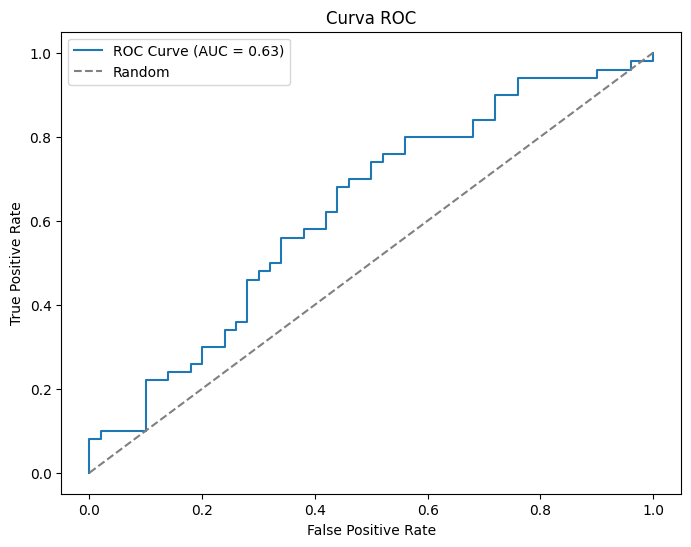

In [ ]:
# Define el modelo de Regresión Logística
model = LogisticRegression()

# Entrena el modelo
model.fit(X_feat, y_feat)

# Realiza predicciones de probabilidad en el conjunto de prueba
y_prob = model.predict_proba(X_feat)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_feat, y_prob)

# Calcula el AUC (Área bajo la curva ROC)
auc = roc_auc_score(y_feat, y_prob)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

El Área bajo la Curva ROC (AUC) es una métrica que cuantifica la capacidad del modelo para distinguir entre clases positivas y negativas. Representa el área debajo de la curva ROC.
El valor de AUC varía entre 0 y 1, donde un valor de 1 indica un modelo perfecto (puede distinguir perfectamente entre clases), y un valor de 0.5 indica que el modelo no es mejor que una elección aleatoria.
En general, cuanto mayor sea el valor de AUC, mejor será el rendimiento del modelo. Un AUC de 0.5 significa que el modelo no tiene habilidad de clasificación, mientras que un AUC de 1.0 indica un rendimiento perfecto.

# Over/Under Fitting & CrossValidation

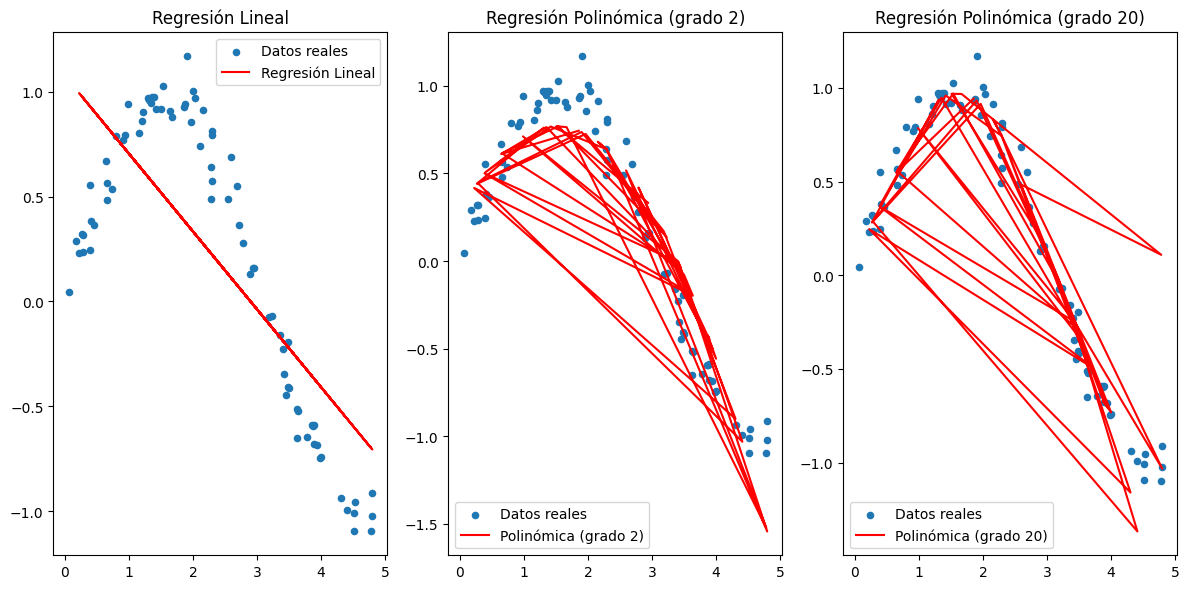

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_fitt, y_fitt, test_size=0.5, random_state=0)

# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Crear un modelo de regresión polinómica de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_poly_pred = model_poly.predict(poly.transform(X_test))

# Crear un modelo de regresión polinómica de grado 20
poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X_train)
model_poly_high_degree = LinearRegression()
model_poly_high_degree.fit(X_poly, y_train)
y_poly_high_degree_pred = model_poly_high_degree.predict(poly.transform(X_test))

# Visualizar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(X_fitt, y_fitt, s=20, label="Datos reales")
plt.plot(X_test, y_pred, color='r', label="Regresión Lineal")
plt.title("Regresión Lineal")
plt.legend()

plt.subplot(132)
plt.scatter(X_fitt, y_fitt, s=20, label="Datos reales")
plt.plot(X_test, y_poly_pred, color='r', label="Polinómica (grado 2)")
plt.title("Regresión Polinómica (grado 2)")
plt.legend()

plt.subplot(133)
plt.scatter(X_fitt, y_fitt, s=20, label="Datos reales")
plt.plot(X_test, y_poly_high_degree_pred, color='r', label="Polinómica (grado 20)")
plt.title("Regresión Polinómica (grado 20)")
plt.legend()

plt.tight_layout()
plt.show()

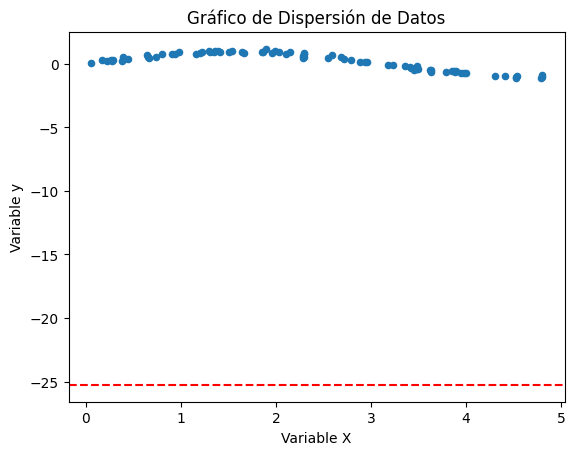

Puntuaciones individuales: [-37.95451531 -64.69472581  -8.22939935   0.5324471  -15.9986848 ]
Puntuación media: -25.26897563534909
Desviación estándar de las puntuaciones: 23.48323470442906


In [ ]:
# Crear un modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada (cross-validation)
# Aquí utilizamos la validación cruzada con k=5 (5-fold cross-validation)
# Esto divide los datos en 5 conjuntos de entrenamiento y prueba diferentes, ajusta el modelo en cada uno de ellos y calcula las puntuaciones de rendimiento (en este caso, el coeficiente de determinación R^2).
# Cuanto más cercano a 1 esté R^2, mejor se ajusta el modelo a los datos
# La validación cruzada de 5 pliegues es una elección común porque proporciona un equilibrio entre la exhaustividad (probar el modelo en varios subconjuntos) y la eficiencia computaciona
scores = cross_val_score(model, X_fitt, y_fitt, cv=5, scoring='r2')

# Calcular la puntuación media y la desviación estándar de las puntuaciones
mean_score = np.mean(scores)
std_score = np.std(scores)
# Calcular la media de y_fitt
mean_y = np.mean(y_fitt)

# Agregar la línea de la media al gráfico
plt.axhline(y=mean_score, color='r', linestyle='--', label="Media de y")

# Crear un gráfico de dispersión de los datos
plt.scatter(X_fitt, y_fitt, label="Datos reales", s=20)
plt.xlabel("Variable X")
plt.ylabel("Variable y")
plt.title("Gráfico de Dispersión de Datos")

# Mostrar el gráfico
plt.show()

# Finalmente, imprimimos las puntuaciones individuales de cada iteración de validación cruzada, la puntuación media y la desviación estándar de las puntuaciones. La puntuación media proporciona una estimación general del rendimiento del modelo, y la desviación estándar indica la variabilidad de las puntuaciones en las iteraciones de la validación cruzada.
print("Puntuaciones individuales:", scores)
print("Puntuación media:", mean_score)
print("Desviación estándar de las puntuaciones:", std_score)

**Desviación Estándar Pequeña:** Si la desviación estándar es pequeña, significa que la mayoría de los valores en el conjunto de datos están cerca de la media. En otras palabras, los datos son relativamente homogéneos y no varían mucho. Esto puede indicar una mayor consistencia o estabilidad en los datos.

**Desviación Estándar Grande:** Si la desviación estándar es grande, indica que los valores en el conjunto de datos están más dispersos en relación con la media. Los datos son heterogéneos y varían ampliamente. Puede sugerir una mayor variabilidad en los datos.

**Comparación con la Media:** Puedes interpretar la desviación estándar en relación con la media. Si la media es 0 (o muy cercana a 0), entonces la desviación estándar muestra cuán dispersos están los datos en relación con ese punto. Si la media no es 0, la desviación estándar te muestra cuánto los valores se alejan de la media.

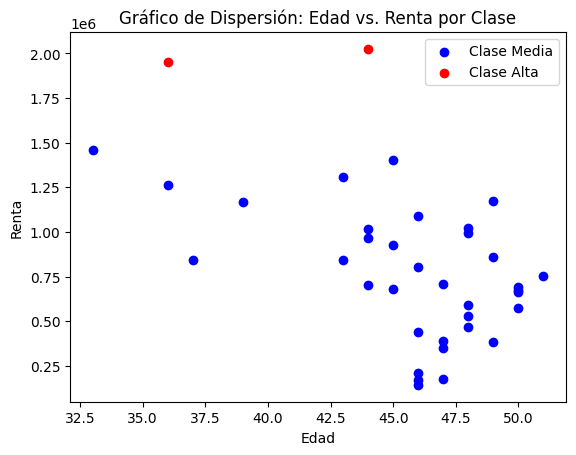

In [ ]:
data = pd.read_excel('data.xlsx')

clase_media = 1800000

# data['Clase'] = 'Clase Media'  # Inicialmente, todos se consideran "Clase Media"
# data.loc[data['Renta'] > clase_media, 'Clase'] = 'Adinerados'
# print(data['Clase'])

data['Clase'] = 0  # Inicialmente, todos se consideran "Clase Media"
data.loc[data['Renta'] > clase_media, 'Clase'] = 1  # Marcar como 1 a los 'Adinerados'
# print(data['Clase'])

X_clase = data[['Renta']]  # Características
y_clase = data['Clase']    # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_clase, y_clase, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Crear el gráfico de dispersión para visualizar las clases
plt.scatter(data[data['Clase'] == 0]['Edad'], data[data['Clase'] == 0]['Renta'], c='b', label='Clase Media')
plt.scatter(data[data['Clase'] == 1]['Edad'], data[data['Clase'] == 1]['Renta'], c='r', label='Clase Alta')

# Agregar etiquetas y título al gráfico
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Gráfico de Dispersión: Edad vs. Renta por Clase')
plt.legend()

# Mostrar el gráfico
plt.show()

# Clustering

In [31]:
# Generar datos aleatorios con clusters más separados
X_cluster, y_cluster = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=2.0)

# Aplicar el algoritmo K-Means para clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calcular la matriz de distancias euclidianas entre todos los puntos de datos
distances_matrix = euclidean_distances(X, centroids)

# Obtener las distancias mínimas entre cada punto de datos y los centroides
min_distances = np.min(distances_matrix, axis=1)

# Calcular la distancia euclidiana entre los centroides
centroid_distance = distance.euclidean(centroids[0], centroids[1])
distancia_minima = np.min(centroid_distance )
distancia_maxima = np.max(centroid_distance )
distancia_promedio = np.mean(centroid_distance )
print(f"Distancia Mínima: {distancia_minima:.4f}")
print(f"Distancia Máxima: {distancia_maxima:.4f}")
print(f"Distancia Promedio: {distancia_promedio:.4f}")

Distancia Mínima: 0.4977
Distancia Máxima: 0.4977
Distancia Promedio: 0.4977


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Distancia entre centroides:** Es la distancia entre los puntos que representan los centroides de dos clusters diferentes. La distancia puede calcularse de diversas maneras, siendo la distancia euclidiana una opción común.

**Interpretación:** Una distancia entre centroides mayor indica una mayor separación o disimilitud entre los clusters, mientras que una distancia menor indica que los clusters están más cercanos o son más similares entre sí. Por lo tanto, la distancia entre centroides es una medida que puede ayudar a evaluar la coherencia y la separación de los clusters.

**Distancia Mínima:** Representa la menor distancia entre los centroides de los dos clusters. Indica la separación mínima entre los puntos centrales de los clusters.

**Distancia Máxima:** Representa la mayor distancia entre los centroides de los dos clusters. Indica la separación máxima entre los puntos centrales de los clusters.

**Distancia Promedio:** Representa la distancia promedio entre los centroides de los dos clusters. Es la medida de distancia promedio entre los puntos centrales de los clusters.

Si estas distancias son iguales, significa que los centroides están equidistantes entre sí. En términos de clustering, esto podría interpretarse de varias maneras:

**Clusters bien separados:** Si las distancias son iguales y relativamente grandes, significa que los clusters están bien separados y son distintos entre sí.

**Clusters superpuestos:** Si las distancias son pequeñas, pero iguales, podría indicar que los clusters están más cerca y podrían superponerse. En este caso, la igualdad de distancias no siempre significa que los clusters son idénticos.

**Ejemplos de Interpretación**

**Distancia Cercana a 0:**

**Valor: 0.05**
Interpretación: Los centroides están muy cerca entre sí, lo que podría sugerir una superposición significativa o similitud entre clusters.
Distancia Pequeña:

**Valor: 0.5**
Interpretación: Los centroides están separados, pero no de manera significativa. Podría indicar similitudes parciales entre clusters.
Distancia Moderada:

**Valor: 1.2**
Interpretación: Los centroides están moderadamente separados, indicando que los clusters son distintos, pero no completamente independientes.
Distancia Grande:

**Valor: 3.8**
Interpretación: Los centroides están bien separados, sugiriendo que los clusters son muy distintos y no comparten similitudes significativas.

In [28]:
# Calcular la similitud como la inversa de la distancia euclidiana (mayor similitud para distancias más pequeñas)
similarity = 1 / (1 + min_distances)

# Imprimir la similitud para cada punto de datos
# for i, sim in enumerate(similarity):
#     print(f"Punto de datos {i+1}: Similitud = {sim:.4f}")

# Calcular la similitud entre los centroides de los clusters
centroids_similarity_matrix = 1 / (1 + euclidean_distances(centroids, centroids))

# Imprimir la similitud entre los centroides
print("\nSimilitud entre los centroides de los clusters:")
print(centroids_similarity_matrix)


Similitud entre los centroides de los clusters:
[[1.        0.0889196]
 [0.0889196 1.       ]]


Interpretar la similitud entre los centroides implica entender cuán parecidos son los clusters entre sí en términos de sus centros. La similitud de los centroides puede proporcionar información sobre la cohesión de los clusters en el espacio de características.

**Similitud cercana a 1:** Si la similitud entre los centroides es cercana a 1, significa que los clusters son bastante similares entre sí en términos de sus centros. Los clusters podrían tener formas y tamaños parecidos.

**Similitud menor:** Si la similitud entre los centroides es menor, los clusters son menos similares. Esto podría indicar que los clusters son más distintos entre sí, posiblemente con una mayor separación en el espacio de características.

**centroids_similarity_matrix[0, 0]:** Representa la similitud del primer centroide consigo mismo. Dado que estamos calculando la similitud, este valor debería ser 1.0.

**centroids_similarity_matrix[1, 1]:** Representa la similitud del segundo centroide consigo mismo. Al igual que en el caso anterior, este valor debería ser 1.0.

**centroids_similarity_matrix[0, 1]:** Representa la similitud entre el primer centroide y el segundo centroide. Este valor indica cuán parecidos son los dos centroides entre sí. Un valor cercano a 1 indica alta similitud, mientras que un valor más bajo indica menor similitud.

**centroids_similarity_matrix[1, 0]:** Dado que la similitud entre A y B es la misma que entre B y A en este contexto, este valor también representa la similitud entre el segundo centroide y el primer centroide.

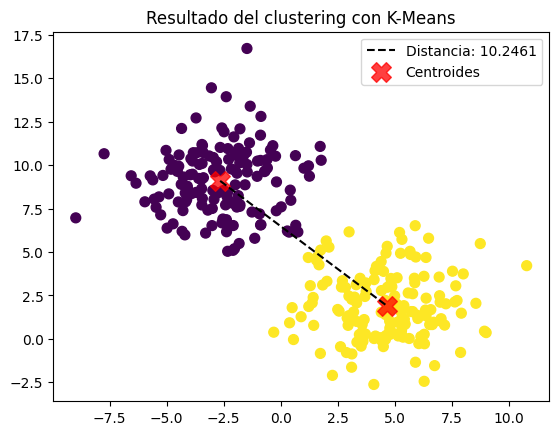

In [30]:
# Dibujar una línea entre los centroides y mostrar la distancia
plt.plot([centroids[0, 0], centroids[1, 0]], [centroids[0, 1], centroids[1, 1]], 'k--', label=f'Distancia: {centroid_distance:.4f}')

# Visualizar los resultados del clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, alpha=0.75, label='Centroides')
plt.title("Resultado del clustering con K-Means")
plt.legend()
plt.show()

**Distancia entre centroides:** Es la distancia entre los puntos que representan los centroides de dos clusters diferentes. La distancia puede calcularse de diversas maneras, siendo la distancia euclidiana una opción común.

**Interpretación:** Una distancia entre centroides mayor indica una mayor separación o disimilitud entre los clusters, mientras que una distancia menor indica que los clusters están más cercanos o son más similares entre sí. Por lo tanto, la distancia entre centroides es una medida que puede ayudar a evaluar la coherencia y la separación de los clusters.